# Task 2
This week you have learnt about various types of ML models. <br>
Let us focus on two of them.

In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


# Instructions
1. create a folder called synapse_w2 in your drive
2. add housing_data.csv, classified_data.txt, titanic_data.csv in the folder.
3. You will use the data from this path in this notebook

In [2]:
path1 = "/content/gdrive/MyDrive/synapse_w2/synapse_w2/housing_data.csv"
path2 = "/content/gdrive/MyDrive/synapse_w2/synapse_w2/classified_data.txt"
path3 = "/content/gdrive/MyDrive/synapse_w2/synapse_w2/titanic_data.csv"


# 1)  Linear Regression on Housing Price

### Import packages and dataset

In [3]:
# import numpy, pandas, matplotlib, seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
house_df = pd.read_csv(path1)
class_df = pd.read_csv(path2)
titanic_df = pd.read_csv(path3)
%matplotlib inline

**Read housing_data.csv using pandas and call head() to show first few records.**

In [ ]:
house_df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


### Exloratory Data Analysis (EDA)

**'info()' method to check the data types and number**

In [ ]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


**Get the statistical summary of the data set** <br>
Hint: describe()

In [ ]:
house_df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


**Print the names of the columns(features)**

In [ ]:
print("The name of columns are = ")
for i in house_df.columns:
  print(i)

The name of columns are = 
Avg. Area Income
Avg. Area House Age
Avg. Area Number of Rooms
Avg. Area Number of Bedrooms
Area Population
Price
Address


### Basic plotting and visualization

**The target quantity is price. Let us see its distribution.** <br>
Plot a histogram of Price. Choose the number of bins by experimenting a little. (Expected: a bell curve shape)

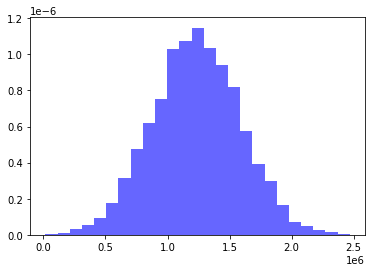

In [ ]:
plt.hist(house_df['Price'], bins=25, density=True, alpha=0.6, color='b')
  
plt.show()

**Let us see how the different features are correlated with each other by printing a Correlation Matrix**<br>
Hint: corr()

In [ ]:
house_df.corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


### Feature and variable sets

**Make a list of data frame column names**
**Create a new dataframe containing all the numerical training features(note that Address is a string so ignore that) and store it in a variable called "X"**<br><br>
**Then create a new dataframe containing the target (Price) and store it in a variable called "y"**

In [4]:
x = pd.DataFrame(house_df.iloc[:,:5]).astype('float')
y = pd.DataFrame(house_df['Price']).astype('float')

In [ ]:
# This code should print (5000, 5) and (5000,) if everything is correct
print(x.shape)
print(y.shape)

(5000, 5)
(5000, 1)


In [ ]:
# print a few record of X
x.head()


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,61287.067179,5.865890,8.512727,5.13,36882.159400
3,63345.240046,7.188236,5.586729,3.26,34310.242831
4,59982.197226,5.040555,7.839388,4.23,26354.109472


In [ ]:
# print a few record of y
# add code here
y.head()

,Price
0,1.059034e+06
1,1.505891e+06
2,1.058988e+06
3,1.260617e+06
4,6.309435e+05


### Test-train split

**Import train_test_split function from scikit-learn**

In [6]:
# add code here
from sklearn.model_selection import train_test_split

**Create X and y train and test splits in one command using a test size of 0.3 and a random seed**<br>
They should be called X_train, X_test, y_train, y_test

In [7]:
# add code here
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

**Print the size and shape of each of the train/test splits (it should be in the ratio as per test_size parameter above)**

In [ ]:
# add code here
print("The shape of x_train",x_train.shape)
print("The shape of y_train",y_train.shape)
print("The shape of x_test",x_test.shape)
print("The shape of y_test",y_test.shape)


The shape of x_train (3500, 5)
The shape of y_train (3500, 1)
The shape of x_test (1500, 5)
The shape of y_test (1500, 1)


### Model fit and training

**Import LinearRegression and metrics from scikit-learn**

In [ ]:
# add code for imports here
from sklearn.linear_model import LinearRegression

from sklearn import metrics 
# Create a Linear Regression object 'lm' by calling LinearRegression()
lm = LinearRegression()


**Fit the model on to the instantiated object itself using the X_train and y_train created earlier. No need to create another variable**<br>
Hint: lm.fit()

In [ ]:
# add code here
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Prediction, error estimate, and regression evaluation matrices

**Prediction using the lm model**<br>
Use model.predict() on X_test and store them in a variable called "predictions".<br>
Print type and size of the predictions. Size should be (1500,) if everything is correct.

In [ ]:
# add code here
predictions = lm.predict(x_test)
predictions.shape

(1500, 1)

**Since we're done with our predictions, let's compare it with y_test and see how accurate our predictions are.<br> Plot a Scatter plot of predicted price and y_test set to see if the data fall on a 45 degree straight line**

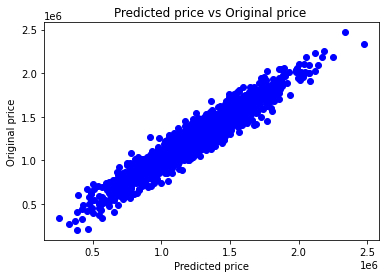

In [ ]:
# add code here
plt.scatter(predictions,y_test,color='blue')
plt.title('Predicted price vs Original price ')  
plt.xlabel('Predicted price')  
plt.ylabel('Original price') 
plt.show()

**Print the R-square value and round it to 3 decimal places**<br>
Hint: sklearn metrics.r2_score

In [ ]:
# add code here
from sklearn.metrics import mean_squared_error,r2_score

In [ ]:
#printing r2_score
print("r2_score: %.3f " % r2_score(y_test,predictions))

r2_score: 0.915 


# Extra Applications.

In [ ]:
#printing mean absolute error
print('Mean Absolute Error:%.3f'% metrics.mean_absolute_error(y_test, predictions)) 

Mean Absolute Error:81135.566


In [ ]:
#printing mean square error
print('Mean squared error = %.3f' % mean_squared_error(y_test,predictions))

Mean squared error = 10068422551.401


# Week 3 applying hyperparameteres.

In [10]:
from sklearn.linear_model import LinearRegression

# applying k-fold cross validation.

In [11]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(LinearRegression(), x_train, y_train, cv=5))

[0.91757367 0.91133642 0.91944728 0.92178798 0.92438046]


The mean of the best score obtain 

In [12]:
print(np.mean(cross_val_score(LinearRegression(), x_train, y_train, cv=5)))

0.9189051602047609


# 2) K-nearest neighbor Classification

### Import packages and dataset

In [ ]:
# import numpy, pandas, matplotlib, seaborn
# add code here
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Read classified_data.txt using pandas and call head() to show first few records. Call this dataframe "df"** <br>
Use "index_col" parameter to index the dataframe according to the first column. Otherwise, a new column would get created.

In [ ]:
class_df = pd.read_csv(path2,index_col= 0)
class_df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


### Exloratory Data Analysis (EDA)

**'info()' method to check the data types and number**

In [ ]:
# add code here
class_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   WTT           1000 non-null   float64
 1   PTI           1000 non-null   float64
 2   EQW           1000 non-null   float64
 3   SBI           1000 non-null   float64
 4   LQE           1000 non-null   float64
 5   QWG           1000 non-null   float64
 6   FDJ           1000 non-null   float64
 7   PJF           1000 non-null   float64
 8   HQE           1000 non-null   float64
 9   NXJ           1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 93.8 KB


**Get the statistical summary of the data set** <br>
Hint: describe()

In [ ]:
class_df.describe()


,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,0.949682,1.114303,0.834127,0.682099,1.032336,0.943534,0.963422,1.071960,1.158251,1.362725,0.50000
std,0.289635,0.257085,0.291554,0.229645,0.243413,0.256121,0.255118,0.288982,0.293738,0.204225,0.50025
min,0.174412,0.441398,0.170924,0.045027,0.315307,0.262389,0.295228,0.299476,0.365157,0.639693,0.00000
25%,0.742358,0.942071,0.615451,0.515010,0.870855,0.761064,0.784407,0.866306,0.934340,1.222623,0.00000
50%,0.940475,1.118486,0.813264,0.676835,1.035824,0.941502,0.945333,1.065500,1.165556,1.375368,0.50000
75%,1.163295,1.307904,1.028340,0.834317,1.198270,1.123060,1.134852,1.283156,1.383173,1.504832,1.00000
max,1.721779,1.833757,1.722725,1.634884,1.650050,1.666902,1.713342,1.785420,1.885690,1.893950,1.00000


### Check the spread of the features

**Store the column names in a list**

In [ ]:
cols = []
for i in class_df.columns:
  cols.append(i)
print(cols)

['WTT', 'PTI', 'EQW', 'SBI', 'LQE', 'QWG', 'FDJ', 'PJF', 'HQE', 'NXJ', 'TARGET CLASS']


**Run a 'for' loop to draw boxplots of all the features for '0' and '1' TARGET CLASS**<br>
Hint: Loop through each of the 10 features and draw a separate boxplot. You should have 10 boxplots in total. <br>
Refer seaborn boxplot() 

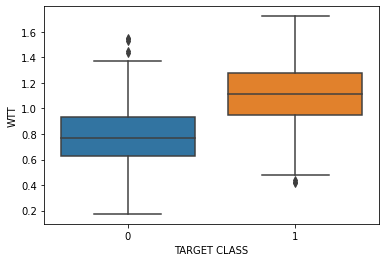

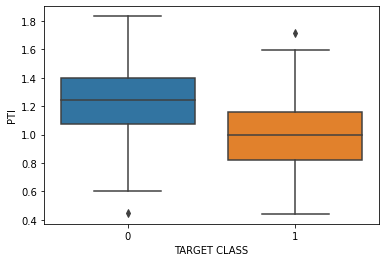

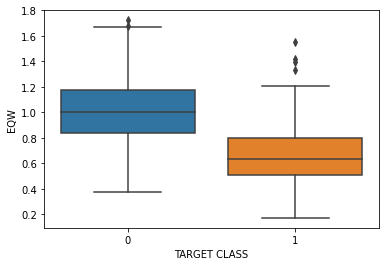

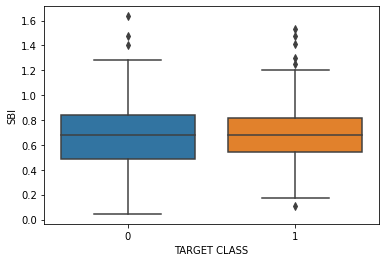

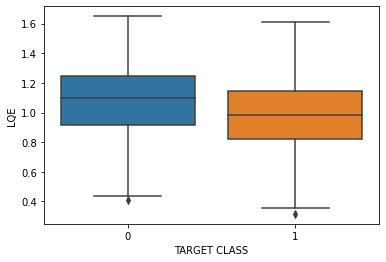

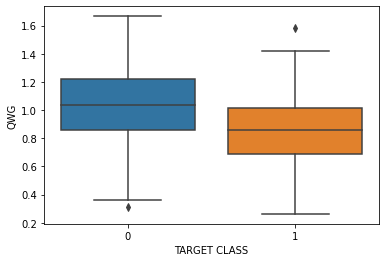

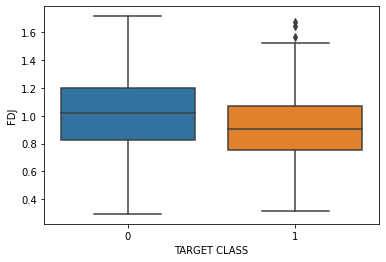

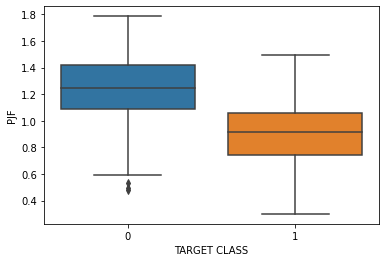

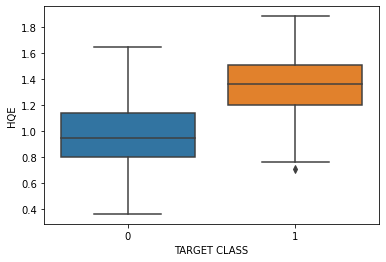

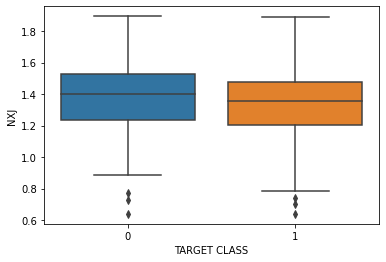

In [ ]:
features=cols[:-1]
for i in features:
    sns.boxplot(data=class_df, x="TARGET CLASS",y=i)
    plt.show()

### Standardize the features using sklearn.preprocessing 
Why should we standardize?<br>
Variables that are measured at different scales do not contribute equally to the model fitting & model learned function and might end up creating a bias. Thus, to deal with this potential problem feature-wise standardized (μ=0, σ=1) is usually used prior to model fitting.<br>
<br>
Go through this link for a better understanding:<br>
https://towardsdatascience.com/how-and-why-to-standardize-your-data-996926c2c832

**import StandardScaler from Sklearn and instantiate it to a variable called "scaler"**

In [ ]:
# add code here
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

**Fit only the features data to this scaler (leaving the TARGET CLASS column out) and then transform**<br>
Hint: scaler.fit() and scaler.transform()

In [ ]:
scaler.fit(class_df.drop('TARGET CLASS',axis = 1))
scl_features = scaler.transform(class_df.drop('TARGET CLASS',axis = 1))

**Scaler.transform() will return an array. We need to convert this into a dataframe. Do this and add the column names to the dataframe. Call this new dataframe as "df_feat". Call head() on this df**<br>
Note: The final dataframe will have the initial columns except the "TARGET CLASS".

In [ ]:
df_feat = pd.DataFrame(scl_features,columns=class_df.columns[:-1])
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


### Train/Test split

**Set X to be equal to df_feat and set y accordingly. As you know, X contains our training features and y contains our target.**<br>
Hint: y can be taken directly from the initaial dataframe "df"

In [ ]:

x = df_feat
y = class_df["TARGET CLASS"]

**Import train_test_split function from scikit-learn**<br>
**Create X and y train and test splits in one command using a test size of 0.3 and a random seed**<br>
They should be called X_train, X_test, y_train, y_test

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

### Model fit and training

**import KNeighborsClassifier from sklearn and initialize it with neighbours = 1. Fit this on X_train and y_train**

In [ ]:
# add code here
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

**Using this fitted model, predict on X_test. Store these predictions in variable called pred.**

In [ ]:
pred = knn.predict(x_test)


**Let us check how correct these predictions are.<br>
Print a classification report of y_test and pred**<br>
Hint: sklearn classification_report

In [ ]:
# add code here
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94       151
           1       0.92      0.96      0.94       149

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



**Print the accuracy using numpy and round it to 3 decimal places.**

In [ ]:
from sklearn.metrics import accuracy_score
print("The accuracy score is %.3f" %accuracy_score(y_test,pred))

The accuracy score is 0.940


### Choosing optimal 'k'

**Above, we chose n_neighbours to be equal to 1. Choosing a small value of K leads to unstable decision boundaries. <br>
We need to select n_neighbours by calculating the accuracy for every value of n from 1 to 60 and then choosing the one which gives the highest accuracy.**

In [ ]:
# Do the same as we did above, but this time make a loop from n = 1 to n = 60 and append the accuracy
accuracy = []
# for each in a list
for i in range(1,60):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train,y_train)
  accuracy.append(knn.score(x_train,y_train))
# add code here
accuracy

**Plot a graph of K value vs Accuracy**

Text(0, 0.5, 'accuracy')

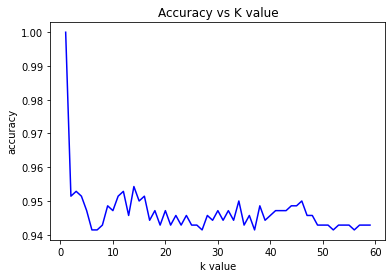

In [ ]:
# add code here
plt.plot(range(1,60),accuracy,color="blue")
plt.title('Accuracy vs K value')
plt.xlabel('k value')
plt.ylabel('accuracy')


**Choose the best value of n_neighbours and give a reason why and also print the accuracy**

In [ ]:
# I will choose K value as 27 cause it is the point where the accuracy is minimum

In [ ]:
knn =  KNeighborsClassifier(n_neighbors=40)
knn.fit(x_train,y_train)
prd = knn.predict(x_test) 
print("The accuracy score is %.3f" %accuracy_score(y_test,prd))

The accuracy score is 0.940


# Week 3


## Importing all the models

In [ ]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

## storeing hyperparameter in dict

In [ ]:
model_para = {
    'svm':{
      'model':svm.SVC(gamma='auto'),
      'params':{
          'C':[1,10,20],
          'kernel':['rbf','linear']
    }
    },
    'random_forest':{
        'model':RandomForestClassifier(),
        'params':{
            'n_estimators':[1,5,10]
        }
    },
    'logistic_regression':{
        'model':LogisticRegression(solver='liblinear',multi_class='auto'),
        'params':{
            'C':[1,5,10]
        }
    },
    'Decision_tree':{
        'model':DecisionTreeClassifier(random_state=10),
        'params':{
            'max_depth':[2,4,6,8,10],
            'criterion':["gini","entropy"]
        }
    }
    
}

## importing Grid search

In [ ]:
from sklearn.model_selection import GridSearchCV

Apllying Grid search

In [ ]:
scores = []
for model_name, mp in model_para.items():
  clf = GridSearchCV(mp['model'],mp['params'],cv=5,return_train_score=False)
  clf.fit(x_train,y_train)
  scores.append({
      'model':model_name,
      'best_score':clf.best_score_,
      'best_params':clf.best_params_
  })
  

### checking the best result of grid search

In [ ]:
scores

[{'best_params': {'C': 1, 'kernel': 'linear'},
  'best_score': 0.9400000000000001,
  'model': 'svm'},
 {'best_params': {'n_estimators': 10},
  'best_score': 0.9199999999999999,
  'model': 'random_forest'},
 {'best_params': {'C': 1},
  'best_score': 0.9400000000000001,
  'model': 'linear_regression'},
 {'best_params': {'criterion': 'gini', 'max_depth': 4},
  'best_score': 0.8785714285714287,
  'model': 'Decision_tree'}]

Here we will use logistic regression to get confusion matrix.

In [ ]:
lg = LogisticRegression(C=1,solver='liblinear',multi_class='auto')
lg.fit(x_train,y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

code for confusion matrix and classification report.

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = lg.predict(x_test)
print("Confusion matrix")
print(confusion_matrix(y_test, y_pred))
print("Classification report")
print(classification_report(y_test, y_pred))

Confusion matrix
[[136   9]
 [  8 147]]
Classification report
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       145
           1       0.94      0.95      0.95       155

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



# 3). Decision Tree Classifier

<b>read the titanic_data.csv using pandas and show the dataframe</b>

In [ ]:
data = pd.read_csv(path3)

<b>Write a function which accepts a dataframe, preprocesses the data (use task 1 notebook) and returns a new dataframe. </b> <br>
you may need a helper function for normalizing data so feel free to define that as well

In [ ]:
def titanic_preprocessing_pipeline(df):
  df =  (df-df.min())/(df.max()-df.min())
  return df  
data.drop(columns=["Name","PassengerId","Cabin","Ticket"],axis=1,inplace=True)
x = data["Embarked"].mode()[0]
data["Embarked"].fillna(x,inplace=True)
y = data["Age"].mean()
data["Age"].fillna(y,inplace=True)
data["Family_members"]=data["SibSp"]+data["Parch"]
data.drop(columns=["SibSp","Parch"],inplace=True)

data['Age'] = titanic_preprocessing_pipeline(data['Age'])
data['Fare'] = titanic_preprocessing_pipeline(data['Fare'])
data['Family_members'] = titanic_preprocessing_pipeline(data['Family_members'])

In [ ]:
data['Sex'] = pd.get_dummies(data['Sex'])
data['Pclass']=pd.get_dummies(data['Pclass'])
data["Embarked"]=pd.get_dummies(data["Embarked"])
data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Family_members
0,0,0,0,0.271174,0.014151,0,0.1
1,1,1,1,0.472229,0.139136,1,0.1
2,1,0,1,0.321438,0.015469,0,0.0
3,1,1,1,0.434531,0.103644,0,0.1
4,0,0,0,0.434531,0.015713,0,0.0


<b>remove the y_label (survived) from the dataframe</b>

In [ ]:
x = data.drop(['Survived'],axis=1)
y = data['Survived']

## <b>Split the data into train and test. (do a split in the ratio 30:70)</b>

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

<b>Now that you have the entire preprocessed and split data, implement the decision tree algorithm from sklearn and fit it to this dataset</b> <br>

Make sure that you play with the hyperparameters to get a good result. You can even use bagging and boosting methods like random forest or adaboost to improve your accuracy. Visualize results, try different hyperparameters by using a loop, GET CREATIVE!<br>

Machine learning is an iteritive process. You will have to keep playing with hyperparameters and algorithms. No fixed algorithm will work on a fixed dataset.

Take this up as a challenge. The person with the best accuracy wins the round!

<b>Note that the accuracy on the test set will be considered and brownie points for not overfitting the model in the process</b>

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=10)
dt1= DecisionTreeClassifier(max_depth = 5,criterion='entropy')

In [ ]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=10, splitter='best')

In [ ]:
print("The train data accuracy is = ",dt.score(x_train,y_train))
print("The test data accuracy is = ",dt.score(x_test,y_test))

The train data accuracy is =  0.9807383627608347
The test data accuracy is =  0.7388059701492538


In [ ]:
dt1.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## checking which point have maximum accuracy


In [ ]:
train_accuracy = []
test_accuracy = []
for depth in range(1,10):
  df = DecisionTreeClassifier(max_depth=depth,random_state=10)
  df.fit(x_train,y_train)
  train_accuracy.append(df.score(x_train,y_train))
  test_accuracy.append(df.score(x_test,y_test))

In [ ]:
frame = pd.DataFrame({'max_depth':range(1,10),'train_acc':train_accuracy,'test_acc':test_accuracy})
frame.head()

,max_depth,train_acc,test_acc
0,1,0.784912,0.791045
1,2,0.815409,0.805970
2,3,0.826645,0.783582
3,4,0.853933,0.820896
4,5,0.861958,0.802239


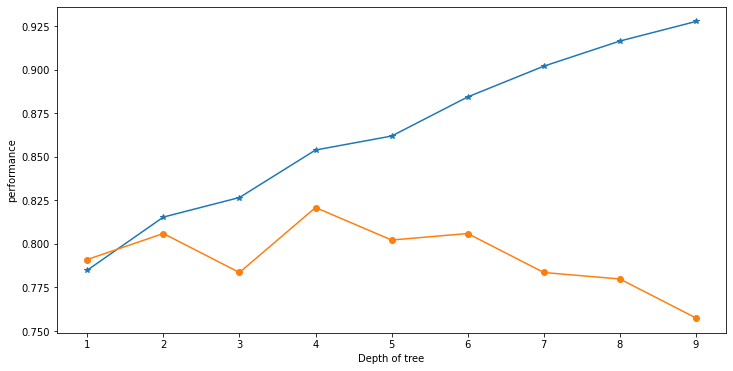

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(frame['max_depth'],frame['train_acc'],marker='*')
plt.plot(frame['max_depth'],frame['test_acc'],marker='o')
plt.xlabel('Depth of tree')
plt.ylabel('performance')
plt.show()


### Takeing max_depth value as 4 as it it the point where test accuracy and train accuracy satisfy the conditon.

In [ ]:
df_model = DecisionTreeClassifier(max_depth=4,max_leaf_nodes=25,random_state=10)
df_model.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=25,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=10, splitter='best')

<b>print the test accuracy and train accuracy here</b>

In [ ]:
print("The train data accuracy is = ",df_model.score(x_train,y_train))
print("The test data accuracy is = ",df_model.score(x_test,y_test))

The train data accuracy is =  0.8539325842696629
The test data accuracy is =  0.8208955223880597


In [ ]:
print("The train data accuracy is = ",dt1.score(x_train,y_train))
print("The test data accuracy is = ",dt1.score(x_test,y_test))

The train data accuracy is =  0.8539325842696629
The test data accuracy is =  0.8208955223880597


## Week 3

importing models 

In [ ]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

## creating hyperparameters and storeing it in dict

In [ ]:
model_para = {
    'svm':{
      'model':svm.SVC(gamma='auto'),
      'params':{
          'C':[1,10,20],
          'kernel':['rbf','linear']
    }
    },
    'random_forest':{
        'model':RandomForestClassifier(),
        'params':{
            'n_estimators':[1,5,10]
        }
    },
    'logistic_regression':{
        'model':LogisticRegression(solver='liblinear',multi_class='auto'),
        'params':{
            'C':[1,5,10]
        }
    },
    'Decision_tree':{
        'model':DecisionTreeClassifier(random_state=10),
        'params':{
            'max_depth':[2,4,6,8,10],
            'criterion':["gini","entropy"]
        }
    }
    
}

# applying grid search.

In [13]:
from sklearn.model_selection import GridSearchCV

In [ ]:
scores = []
for model_name, mp in model_para.items():
  clf = GridSearchCV(mp['model'],mp['params'],cv=5,return_train_score=False)
  clf.fit(x_train,y_train)
  scores.append({
      'model':model_name,
      'best_score':clf.best_score_,
      'best_params':clf.best_params_
  })
  

In [ ]:
scores

[{'best_params': {'C': 20, 'kernel': 'rbf'},
  'best_score': 0.791367741935484,
  'model': 'svm'},
 {'best_params': {'n_estimators': 5},
  'best_score': 0.770541935483871,
  'model': 'random_forest'},
 {'best_params': {'C': 5},
  'best_score': 0.7913161290322581,
  'model': 'logistic_regression'},
 {'best_params': {'criterion': 'gini', 'max_depth': 4},
  'best_score': 0.8121935483870969,
  'model': 'Decision_tree'}]

In this decision tree gives the best accuracy.

In [ ]:
df_model = DecisionTreeClassifier(max_depth=4,criterion='gini',random_state=10)
df_model.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=10, splitter='best')

In [ ]:
pred = df_model.predict(x_test)

Calculating precison f1-score,recall,consusion matrix.

#confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

array([[141,  16],
       [ 32,  79]])

## precision and recall

In [ ]:
from sklearn.metrics import precision_score, recall_score
print("The precision score is = ",precision_score(y_test,pred))
print("The recall score is = ",recall_score(y_test,pred))

The precision score is =  0.8315789473684211
The recall score is =  0.7117117117117117


## f1-score.

In [ ]:
from sklearn.metrics import f1_score
print("The f1-score is = ",f1_score(y_test,pred))

The f1-score is =  0.7669902912621359


## End of task